## 1- library Imports

In [8]:
!pip install varname

In [17]:
#scipy imports
#import scipy 
from scipy import signal
from scipy import stats
import sklearn
import pandas as pd
#from scipy.signal import butter, filtfilt, freqz

#numpy imports
import numpy as np

#matplotlib imports
import matplotlib.pyplot as plt

#sklean imports
from sklearn.decomposition import PCA
from sklearn import preprocessing as prep
#other imports
#from glob import glob
from varname import nameof
%matplotlib inline


# Data Import 
* Load the .txt files of SCG data that are stored in the folder named “dataset” into your python environment.  
* For each .txt data file, select the 3rd column which contains the Z-axis of the SCG signals. 
* Note: the sampling frequency of this signal is 200 Hz. 

        Hint:  
        * to automate the loading process you can get a list of all data file paths using glob package and subsequently load the files in a for loop. 
        
        * dataFiles = glob.glob(path_to_dataset) to get a list of file paths of "dataset\xxdata.txt"
        
         then load the paths one by one in a loop

In [18]:
fs=200 #samp freq

SCG_noisy_1 = np.loadtxt("Noisy_data_1.txt")
SCG_noisy_2 = np.loadtxt("Noisy_data_2.txt")
SCG_noisy_3 = np.loadtxt("Noisy_data_3.txt")
SCG_noisy_4 = np.loadtxt("Noisy_data_4.txt")

SCG_normal_1 = np.loadtxt("Normal_data_1.txt")
SCG_normal_2 = np.loadtxt("Normal_data_2.txt")
SCG_normal_3 = np.loadtxt("Normal_data_3.txt")
SCG_normal_4 = np.loadtxt("Normal_data_4.txt")

SCG_noisy_1 = SCG_noisy_1[:,2]
SCG_noisy_2 = SCG_noisy_2[:,2]
SCG_noisy_3 = SCG_noisy_3[:,2]
SCG_noisy_4 = SCG_noisy_4[:,2]
SCG_normal_1 = SCG_normal_1[:,2]
SCG_normal_2 = SCG_normal_2[:,2]
SCG_normal_3 = SCG_normal_3[:,2]
SCG_normal_4 = SCG_normal_4[:,2]

# Noisy Vs Normal Plotting

* Plot the z-axis SCG signal from the file "Noisy_data_1.txt" and plot the z-axis SCG signal from the file "Normal_data_1.txt" 
* Describe your observations and how the plots differ from one another.


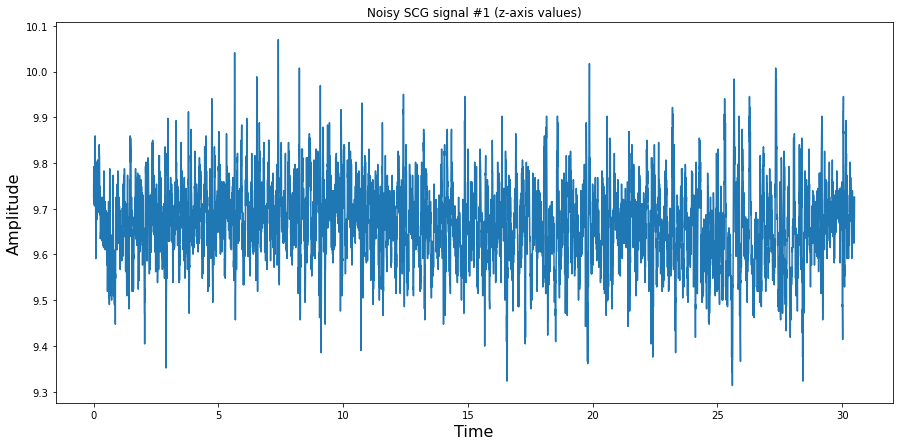

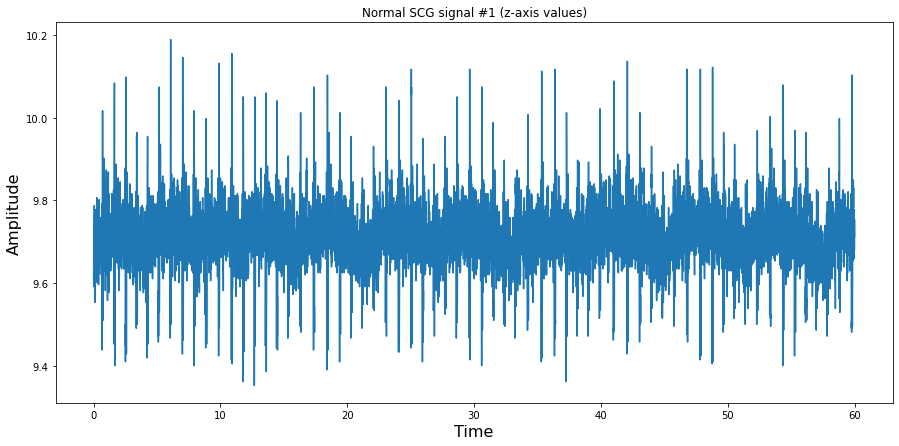

In [19]:
tnoisy1 = np.linspace(0,len(SCG_noisy_1)/fs,len(SCG_noisy_1))
tnormal1 = np.linspace(0,len(SCG_normal_1)/fs,len(SCG_normal_1))

#plot for the noisy signal
plt.figure(figsize=(15,7))
plt.title("Noisy SCG signal #1 (z-axis values)")
plt.xlabel("Time",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(tnoisy1,SCG_noisy_1)

#plot for the normal signal
plt.figure(figsize=(15,7))
plt.title("Normal SCG signal #1 (z-axis values)")
plt.xlabel("Time",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(tnormal1,SCG_normal_1)

Observations:
<br><br> In the case of the noisy plot the resulted artifacts prevent us from properly distinguishing the behaviour of the SCG. We can also observe an oscilating behaviour of the signal (up-down), revolving around the 9.7 amplitude. When it comes to the normal plot, the peaks and valleys corresponding to heart functions are more orderly and easier to distinguish when we zoom in on the signal. The amplitude in this case also revolves around 9.7, but the plot is straight. Causes for the noise/ noisy artifacts can be: body movements, chest movements, atrial fibrilations.<br><br>

# Data Segmentation 
* Here is a simple function to use for data segmentation
* Segment the Z-axis signals into 5-second segments
* The sampling frequency used to record these signals is 200 Hz.
* Store the segments and the accompanying labels

In [20]:
#code (provided)

def _slicing(sig, file_label, segment_length = 1000):
    
    """
    inputs:
    sig : input array to be segmented
    file_label : label to be applied to segmented signal
    segment_length : Length in samples of the segments produced from the input signal
    
    outputs:
    sig_sliced : a list of segments
    label : a list of corresponding labels for the segmented signal 
    
    """

    sig_sliced = []
    label = []
    
    # slicing 
    
    for i in np.arange(int(len(sig)/segment_length)):

        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )

        label.append(file_label)
        
    return (sig_sliced , label)

# Feature Extraction Function Creation
*  Define a function and name it “feature_extraction” in which you compute and return the features listed below
    * *Time Domain Features*:  mean, standard deviation, interquartile-range, median, peak-to-peak range, skewness, kurtosis, and root mean square. 
    * *Frequency Domain Features*: power spectral density (using welch function of scipy)
    
        * For power spectral density, Calculate the total power spectral density within frequency bins of 4 Hz steps. Discard the frequencies above 40 Hz. Get the power within each bin.
    
        Hint:
        
        Reference: https://docs.scipy.org/doc/scipy/reference/stats.html for skewness, kurtosis, interquartile-range(iqr)
        
        Reference: https://numpy.org/doc/stable/reference/routines.statistics.html for other time domain features
        
        Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html for transforming to zero mean and unit variance



In [21]:
#code
def feature_extraction(sig, fs = 200):
    
    
    """
    inputs:
    sig : input array to extract features from
    fs : sampling frequency of input array

    
    outputs:
    feature_array: an array containing all the features extracted from the signal 
    """
    
    
    ########################################## statistical features - time domain


    mean = np.mean(sig)
    standard_deviation = np.std(sig)
    median = np.median(sig)
    interquartile_range = np.quantile(sig,0.75) - np.quantile(sig,0.25)
    peak_to_peak_range = np.abs(np.amax(sig)) + np.abs(np.amin(sig))
    skewness = stats.skew(sig)
    kurtosis = stats.kurtosis(sig)
    root_mean_square = np.sqrt(np.mean(sig**2))
        
    ########################################## PSD 
    
    # transforming to zero mean and unit variance -- only do this when extracting PSD
    # Hint: transfromed_sig = function_for_scale(sig)
    
    frequencies , PSD = signal.welch(sklearn.preprocessing.scale(sig), fs=fs)
    
    freqs_arr = np.arange(0,41,4)
    
    PSD_binned_sum = [] 
    
    for i in range(freqs_arr.shape[0]-1): 
        
        PSD_binned_sum.append (np.sum(PSD[np.where( (frequencies >= freqs_arr[i] ) & 
                                                   ( frequencies < freqs_arr[i+1] ) )]) )
        
    
    # return the feature array
    return ([mean, standard_deviation, median, interquartile_range, peak_to_peak_range, 
            skewness, kurtosis, root_mean_square, PSD_binned_sum])


# Feature Extraction Application

* You must first segment your signals and then extract features from each segment. You could do it in the following way:



* Call the _slicing function to section all the z-axis data into 5-second segments
        Hint: Load each file in "dataFiles" with for-loop
* Use the feature extraction function you created and extract features from every segment that you have obtained.
* Store the labels and the features you extracted from each segment to numpy arrays. 
        Hint: Think of an easy way to extract the label "noisy" or "normal" from each file name
        str.split() could be used somehow in this case

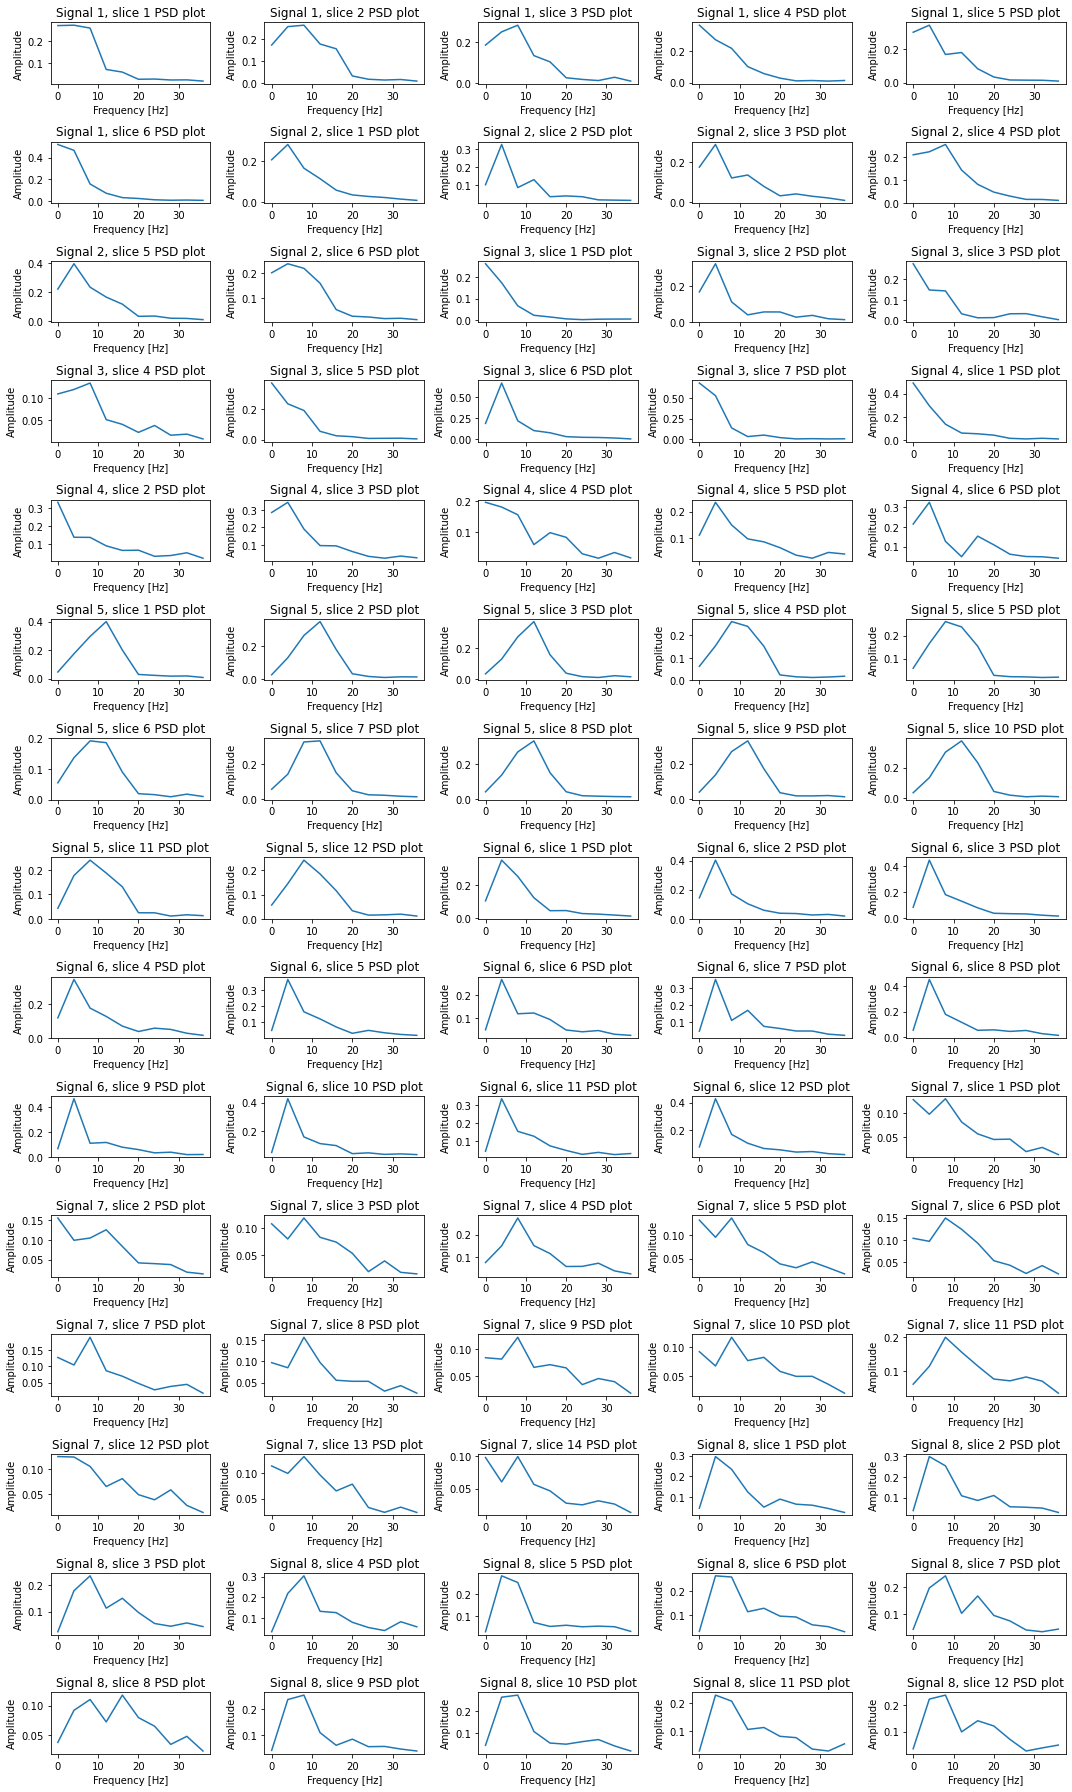

In [25]:
sliced_signal = [None] * 8
n_or_n = [None] * 8
labels = [None] * 8

n_or_n[0] = (nameof(SCG_noisy_1).split('_'))[1]
n_or_n[1] = (nameof(SCG_noisy_2).split('_'))[1]
n_or_n[2] = (nameof(SCG_noisy_3).split('_'))[1]
n_or_n[3] = (nameof(SCG_noisy_4).split('_'))[1]
n_or_n[4] = (nameof(SCG_normal_1).split('_'))[1]
n_or_n[5] = (nameof(SCG_normal_2).split('_'))[1]
n_or_n[6] = (nameof(SCG_normal_3).split('_'))[1]
n_or_n[7] = (nameof(SCG_normal_4).split('_'))[1]

for i,j in enumerate([SCG_noisy_1, SCG_noisy_2, SCG_noisy_3, SCG_noisy_4, SCG_normal_1,
         SCG_normal_2, SCG_normal_3, SCG_normal_4]):
    sliced_signal[i] , labels[i] = _slicing(j, n_or_n[i], segment_length = 1000)

sum_of_lenghts = 0
for i in range(len(sliced_signal)):
    sum_of_lenghts = sum_of_lenghts + len(sliced_signal[i])

features = np.zeros((sum_of_lenghts,8)) 
new_label = [None] * sum_of_lenghts
PSD = [None] * sum_of_lenghts

fig, axes = plt.subplots(nrows=15, ncols=5,figsize=(15,25))
i=0;
for k in range(len(sliced_signal)):
    for j in range(len(sliced_signal[k])):
        features[i] = (feature_extraction((sliced_signal[k])[j], fs = 200))[0:8]
            # getting only the first 8 outputs of the feature extraction function as the 
            # PSD bin array can't be used as a standalone feature for later preprocessing
        PSD[i] = (feature_extraction((sliced_signal[k])[j], fs = 200))[8]
        new_label[i] = (labels[k])[j]
        t = np.arange(0,40,4)
        plt.subplot(15,5,i+1)
        plt.title("Signal "+str(k+1)+", slice "+str(j+1)+" PSD plot")
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Amplitude")
        plt.plot(t,PSD[i])
        i=i+1;
fig.tight_layout()

# Standardize Features
Hint:

    Use sklearn.preprocessing.scale() to standardize the features
    Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [26]:
features = sklearn.preprocessing.scale(features)

# Principal Component Analysis
* Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set consisting of many variables correlated with each other. This can then be used to visualize the data in a more practical way. 
* Compute the first and 2nd principal components
* Plot the two components on a scatter plot with the coloring done by label
* Are these features useful to seperate the two types of signals (noisy vs normal)?
* Describe your observations.
    
        Hint:
        my_pca=PCA(n_components=2)
        pca_out = my_pca.fit_transform(input)

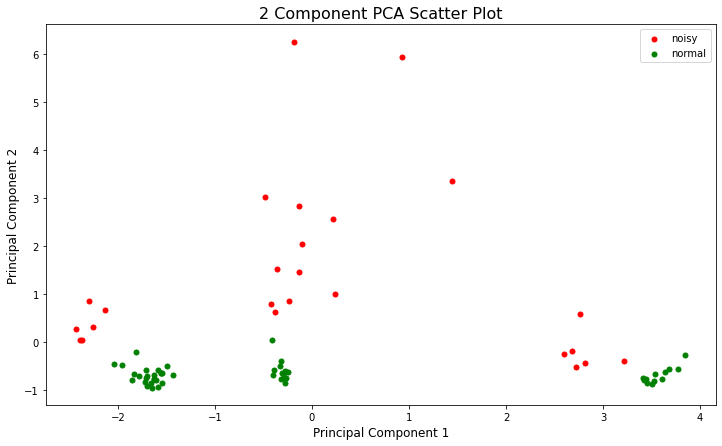

In [27]:
my_pca=PCA(n_components=2)
pca_out = my_pca.fit_transform(features)
new_label = np.array(new_label)

colors = {'noisy': 'red', 'normal': 'green'}

fig, ax = plt.subplots(figsize=(12,7))
for g in np.unique(new_label):
    ix = np.where(new_label == g)
    ax.scatter((pca_out[:,0])[ix], (pca_out[:,1])[ix], c = colors[g], label = g, s = 25)
ax.legend()
plt.title("2 Component PCA Scatter Plot", fontsize=16)
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principal Component 2",fontsize=12)
plt.show()

# Observations 

<br><br> PCA aims to illustrate as much as of the variance in the data as possible by using only a few principal components (in our case only two). Our current graph shows the first and second pricipal components as a scatter plot. Although it's useful to have the principal components computed, if we hadn't separated the points into their respective groups (noisy and normal) we wouldn't be able to distinguish much of anything. We can observe that the normal points tend to clump together at the bottom of the window and span on it's total lenght, while the noisy points tend to stick to the same intervals on the principal component 1 axis, but scatter away on the the principal component 2 axis in a seemingly random manner, which is to be expected. <br><br>